Задание 1. Вычислить площадь фигуры, ограниченной кривыми, заданными в декартовой системе координат.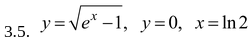


Площадь фигуры: 0.4292


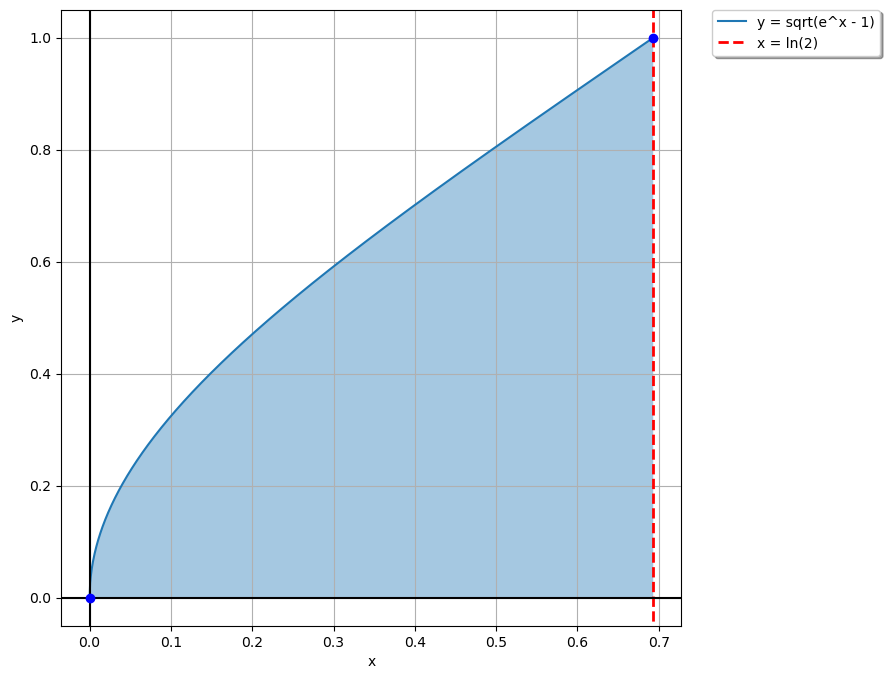

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def y(x):
    return np.sqrt(np.exp(x) - 1)

a = 0
b = np.log(2)

x = np.linspace(a, b, 1000)

plt.figure(figsize=(8, 8))

plt.plot(x, y(x), label='y = sqrt(e^x - 1)')
plt.axvline(x=np.log(2),  ymin=-1, ymax=1, color='r',
          linewidth=2.0, linestyle='--', label='x = ln(2)') 

plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

plt.plot(a, y(a), 'bo')
plt.plot(b, y(b), 'bo')

plt.grid()

S, err = quad(y, a, b)
print(f'Площадь фигуры: {S:.4f}')

plt.fill_between(x, y(x), where=(x>=a)&(x<=b), alpha=0.4)

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.show()


Задание 2. Вычислить площадь фигуры, ограниченной кривыми, заданными в полярной системе координат.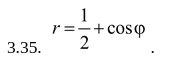

Площадь фигуры: 2.3562


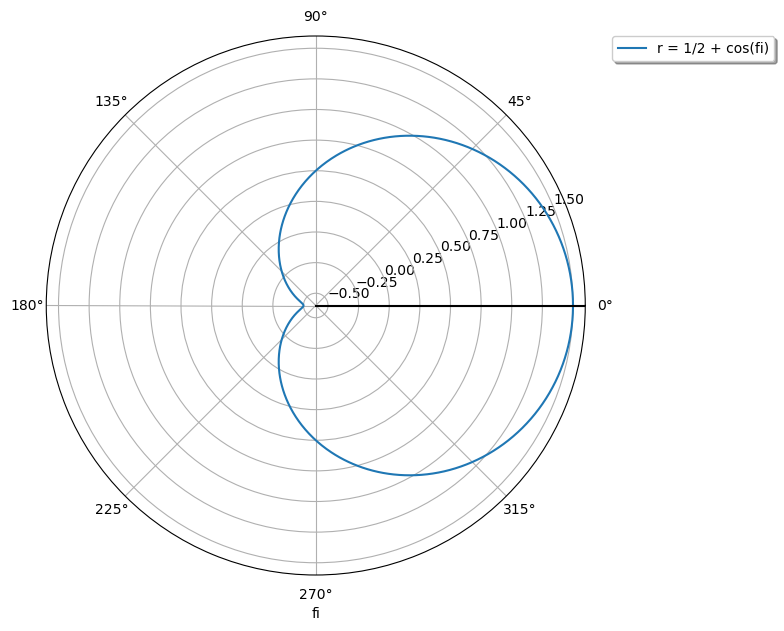

In [6]:
def r(fi):
    return 0.5 + np.cos(fi)

def r_quad(fi):
    return 0.5 * (0.5 + np.cos(fi))**2

fi = np.linspace(0, 2*np.pi, 1000)

plt.figure(figsize=(7, 7))

plt.polar(fi, r(fi), label='r = 1/2 + cos(fi)')

plt.xlabel('fi')

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

plt.grid(True)

S, err = quad(r_quad, 0, 2*np.pi)
print(f'Площадь фигуры: {S:.4f}')

# plt.fill_between(r, r(fi), where=(fi>=0)&(fi<=2*np.pi), alpha=0.4)

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.show()

Задание 3. Вычислить длину дуги, заданной в декартовой системе координат: 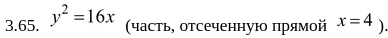

sqrt(1 + 4/x)
Длина дуги: 18.3622


/tmp/ipykernel_228909/1211675436.py:19: RuntimeWarning: invalid value encountered in sqrt
  y1_orig = np.sqrt(x_orig) * 4
/tmp/ipykernel_228909/1211675436.py:20: RuntimeWarning: invalid value encountered in sqrt
  y2_orig = -1 * np.sqrt(x_orig) * 4


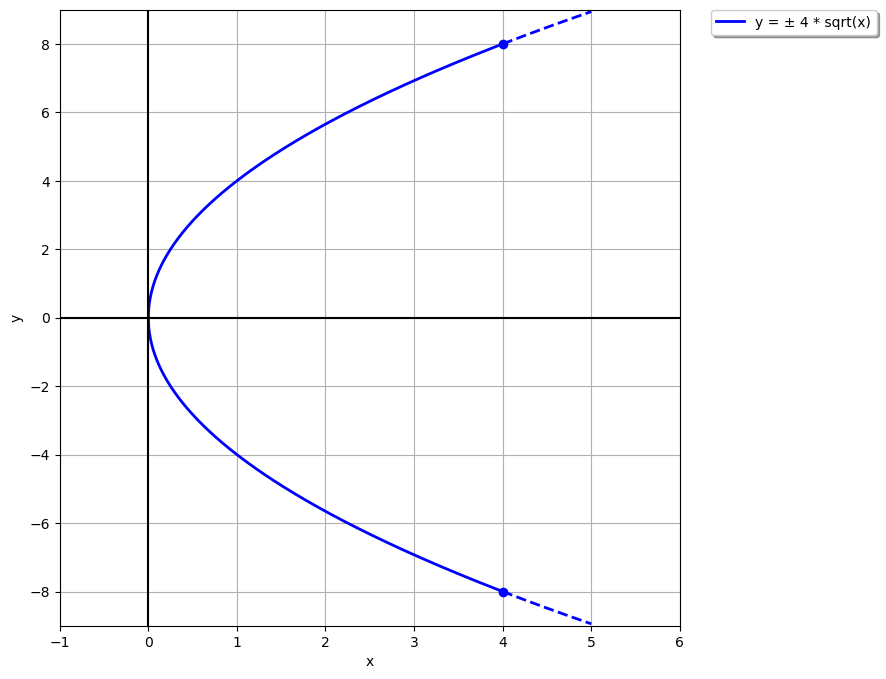

In [7]:
import sympy as sp

x = sp.Symbol('x', real=True)

y = 4 * sp.sqrt(x)

y_diff = sp.diff(y)

integrand_y = sp.sqrt(1 + y_diff**2)

print(integrand_y)

L = 2 * sp.integrate(integrand_y, (x, 0.0000001, 4)).evalf()

print(f'Длина дуги: {L:.4f}')

x_orig = np.linspace(-2, 4, 1000)
x_full = np.linspace(4, 5, 1000)
y1_orig = np.sqrt(x_orig) * 4
y2_orig = -1 * np.sqrt(x_orig) * 4

plt.figure(figsize=(8, 8))

handle1, = plt.plot(x_orig, y1_orig, color='b', linewidth=2.0, label='y = ± 4 * sqrt(x)')
handle2, = plt.plot(x_orig, y2_orig, color='b', linewidth=2.0)
handle3, = plt.plot(x_full, np.sqrt(x_full) * 4, color='b', linestyle = '--', linewidth=2.0)
handle4, = plt.plot(x_full, -1 * np.sqrt(x_full) * 4, color='b', linestyle = '--', linewidth=2.0)

plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

plt.plot(4, 4 * np.sqrt(4), 'bo')
plt.plot(4, -4 * np.sqrt(4), 'bo')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

# plt.axis('square')

plt.axis([-1, 6, -9, 9])

plt.grid()

plt.show()


Задание 4. Вычислить длину дуги, заданной параметрически: 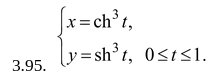

Длина дуги: 3.1486


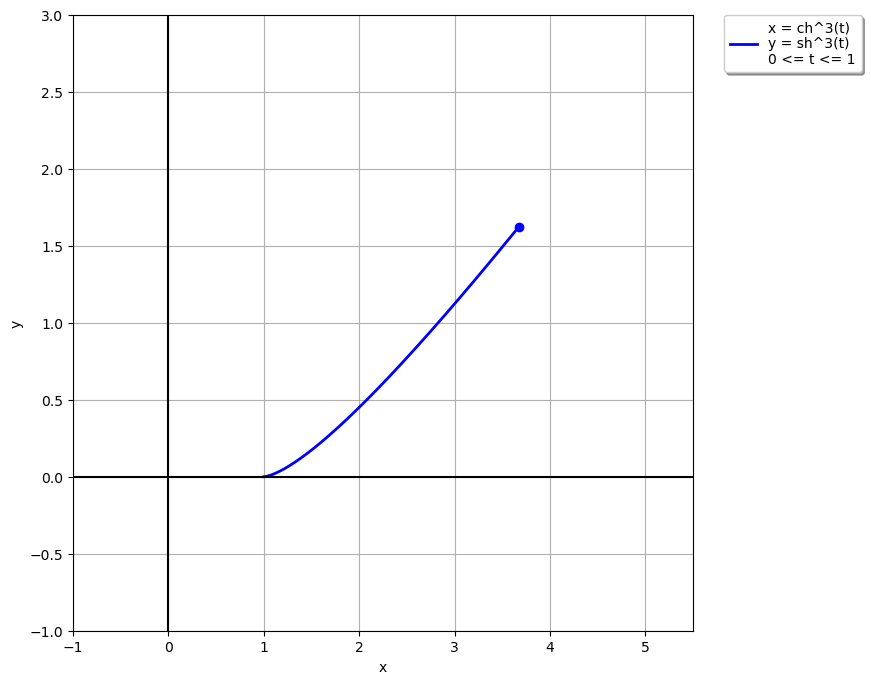

In [11]:
import sympy as sp
# не работает символьное дифференцирование
# t = sp.Symbol('t', real=True)

# x = (sp.cosh(t))**3
# y = (sp.sinh(t))**3

# x_diff = sp.diff(x, t)
# y_diff = sp.diff(y, t)

# integrand = sp.sqrt(x_diff**2 + y_diff**2)

# L = sp.integrate(integrand, (t, 0, 1))

def x(t):
    return (np.cosh(t))**3

def y(t):
    return (np.sinh(t))**3

def dx(t):
    return 3 * np.sinh(t) * np.cosh(t)**2

def dy(t):
    return 3 * np.sinh(t)**2 * np.cosh(t)

def integrand(t):
    return np.sqrt(dx(t)**2 + dy(t)**2)

L, err = quad(integrand, 0, 1)

print(f'Длина дуги: {L:.4f}')

t = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 8))

handle1, = plt.plot(x(t), y(t), color='b', linewidth=2.0,
                    label='x = ch^3(t)\ny = sh^3(t)\n0 <= t <= 1')

plt.plot(x(1), y(1), 'bo')

plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.axis([-1, 5.5, -1, 3])

plt.grid()

plt.show()

Задание 5. Вычислить длину дуги, заданной в полярной системе координат: 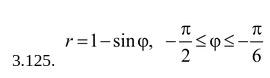

sqrt((1 - sin(fi))**2 + cos(fi)**2)
Длина дуги: 2.0000


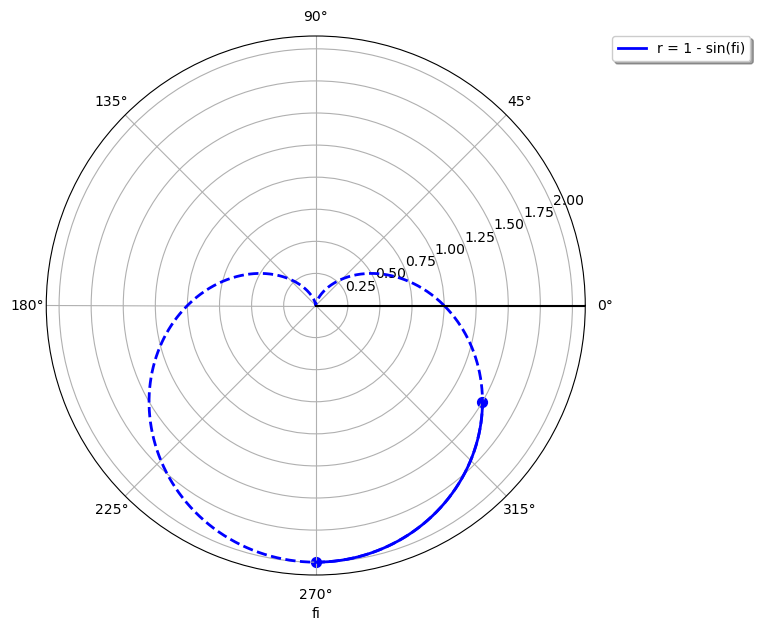

In [32]:
fi = sp.Symbol('fi', real=True)

r = (1 - sp.sin(fi))

r_diff = sp.diff(r, fi)

integrand_r = sp.sqrt(r**2 + r_diff**2)

print(integrand_r)

a = -0.5 * np.pi
b = -1/6 * np.pi

L = sp.integrate(integrand_r, (fi, a, b)).evalf()

print(f'Длина дуги: {L:.4f}')

def r_func(fi):
    return 1 - np.sin(fi)

fi_orig = np.linspace(a, b, 1000)
fi_full = np.linspace(0, 2 * np.pi, 1000)

plt.figure(figsize=(7, 7))

handle1, = plt.polar(fi_orig, r_func(fi_orig), color='b', linewidth=2.0,
                    label='r = 1 - sin(fi)')

handle2, = plt.polar(fi_full, r_func(fi_full), color='b', linewidth=2.0,
                    linestyle='--')

plt.scatter(a, r_func(a), color='blue', s=50)
plt.scatter(b, r_func(b), color='blue', s=50)

plt.xlabel('fi')

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

plt.grid(True)

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.show()


Задание 6. Найти объем тела, образованного вращением фигуры, ограниченной заданными линиями вокруг 
оси OY: 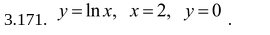

Объём тела вращения: 6.2439


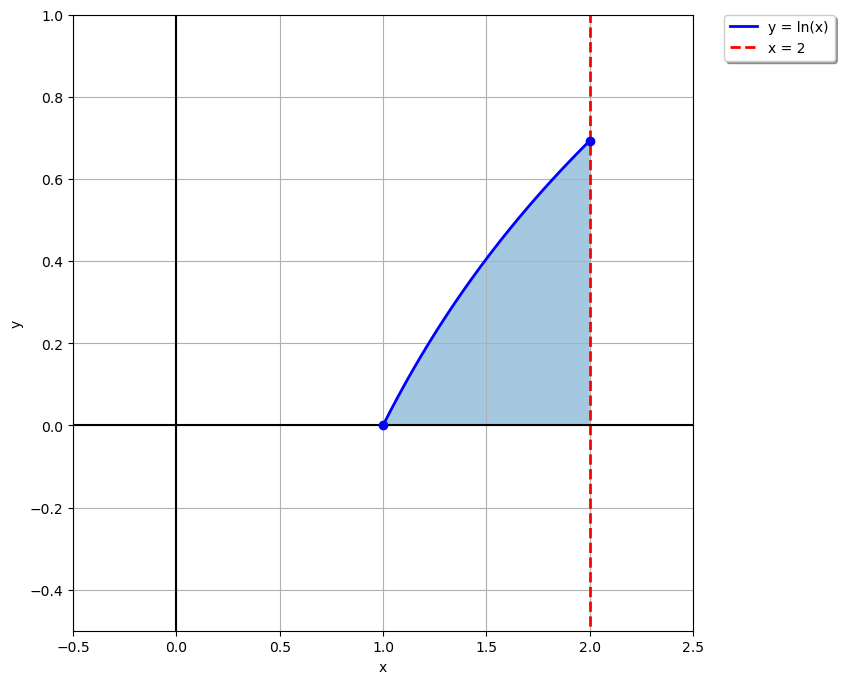

In [42]:
x = sp.Symbol('x', real=True)

f = (sp.ln(x))

integrand = sp.pi * f**2

a = 0
b = float(f.subs(x, 2).evalf())

L = sp.integrate(integrand, (x, a, b)).evalf()

print(f'Объём тела вращения: {L:.4f}')

x_orig = np.linspace(1, 2, 1000)
plt.figure(figsize=(8, 8))

handle1, = plt.plot(x_orig, np.log(x_orig), color='b', linewidth=2.0,
                    label='y = ln(x)')

plt.axvline(x=2,  ymin=-1, ymax=1, color='r',
          linewidth=2.0, linestyle='--', label='x = 2') 

plt.xlabel('x')
plt.ylabel('y')

plt.axvline(x = 0, color = 'k')
plt.axhline(y = 0, color = 'k')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)

plt.fill_between(x_orig, np.log(x_orig),
                where=(x_orig>=1)&(x_orig<=2), alpha=0.4)

plt.plot(1, np.log(1), 'bo')
plt.plot(2, np.log(2), 'bo')

plt.axis([-0.5, 2.5, -0.5, 1])

plt.grid()

plt.show()
